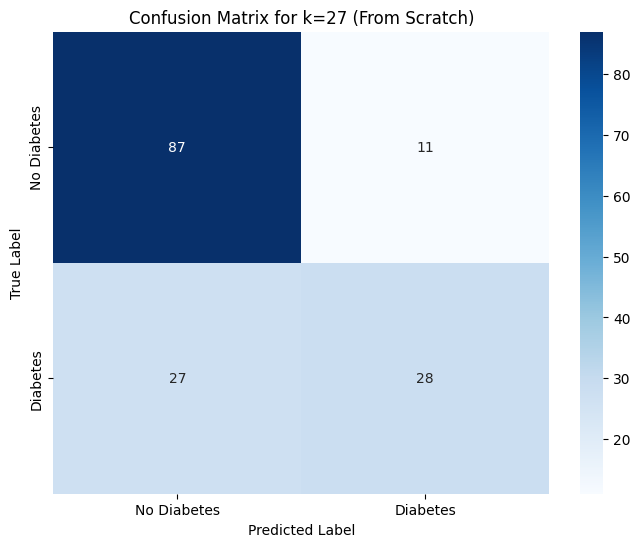

In [2]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

file_path = '/content/diabetes.csv'
diabetes_df = pd.read_csv(file_path)

# Step 1: Handle missing values (if any)
diabetes_df = diabetes_df.fillna(diabetes_df.mean())

# Split the data into features and target variable
X = diabetes_df.drop(columns=['Outcome']).values
y = diabetes_df['Outcome'].values

# Step 2: Split the data into training and testing sets manually
def train_test_split(X, y, test_size=0.2, random_state=None):
    if random_state:
        np.random.seed(random_state)
    indices = np.random.permutation(len(X))
    test_size = int(len(X) * test_size)
    test_indices = indices[:test_size]
    train_indices = indices[test_size:]
    return X[train_indices], X[test_indices], y[train_indices], y[test_indices]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Standardize the feature variables manually
def standardize_data(train, test):
    mean = np.mean(train, axis=0)
    std = np.std(train, axis=0)
    train_standardized = (train - mean) / std
    test_standardized = (test - mean) / std
    return train_standardized, test_standardized

X_train_scaled, X_test_scaled = standardize_data(X_train, X_test)

# Function to compute euclidean distance
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

# k-NN prediction from scratch
def knn_predict(X_train, y_train, X_test, k):
    y_pred = []
    for test_point in X_test:
        distances = []
        for i, train_point in enumerate(X_train):
            distance = euclidean_distance(test_point, train_point)
            distances.append((distance, y_train[i]))

        distances.sort(key=lambda x: x[0])
        neighbors = distances[:k]

        classes = [neighbor[1] for neighbor in neighbors]
        most_common = Counter(classes).most_common(1)[0][0]
        y_pred.append(most_common)
    return np.array(y_pred)

# Predict the outcomes for the test set using k=27 (from scratch)
y_pred_scratch = knn_predict(X_train_scaled, y_train, X_test_scaled, 27)

# Function to compute the confusion matrix manually
def compute_confusion_matrix(y_true, y_pred):
    unique_classes = np.unique(y_true)
    matrix = np.zeros((len(unique_classes), len(unique_classes)), dtype=int)
    for i in range(len(y_true)):
        true_class = y_true[i]
        pred_class = y_pred[i]
        matrix[true_class][pred_class] += 1
    return matrix

# Compute the confusion matrices
conf_matrix_scratch = compute_confusion_matrix(y_test, y_pred_scratch)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_scratch, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for k=27 (From Scratch)')
plt.show()

In [3]:
# Calculate accuracy
accuracy_scratch = np.sum(y_test == y_pred_scratch) / len(y_test)

# Print accuracy
print(f"Accuracy of k-NN model from scratch: {accuracy_scratch:.2f}")

Accuracy of k-NN model from scratch: 0.75


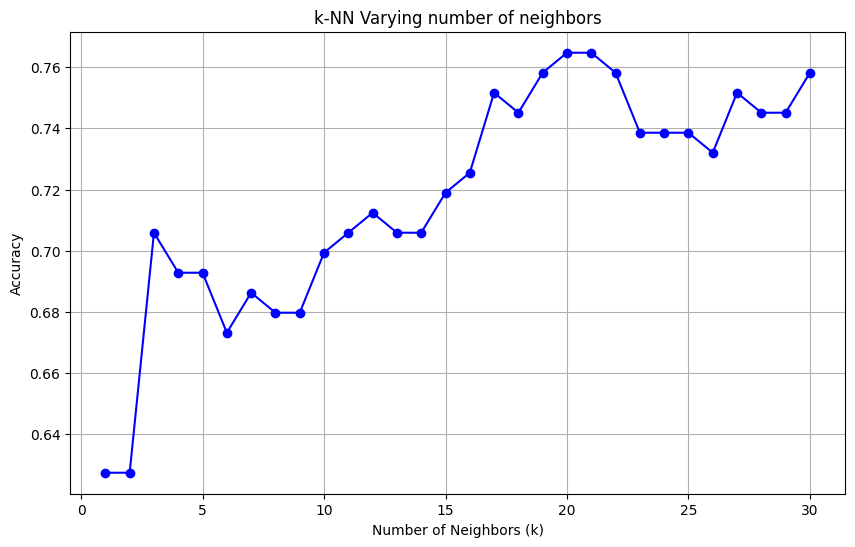

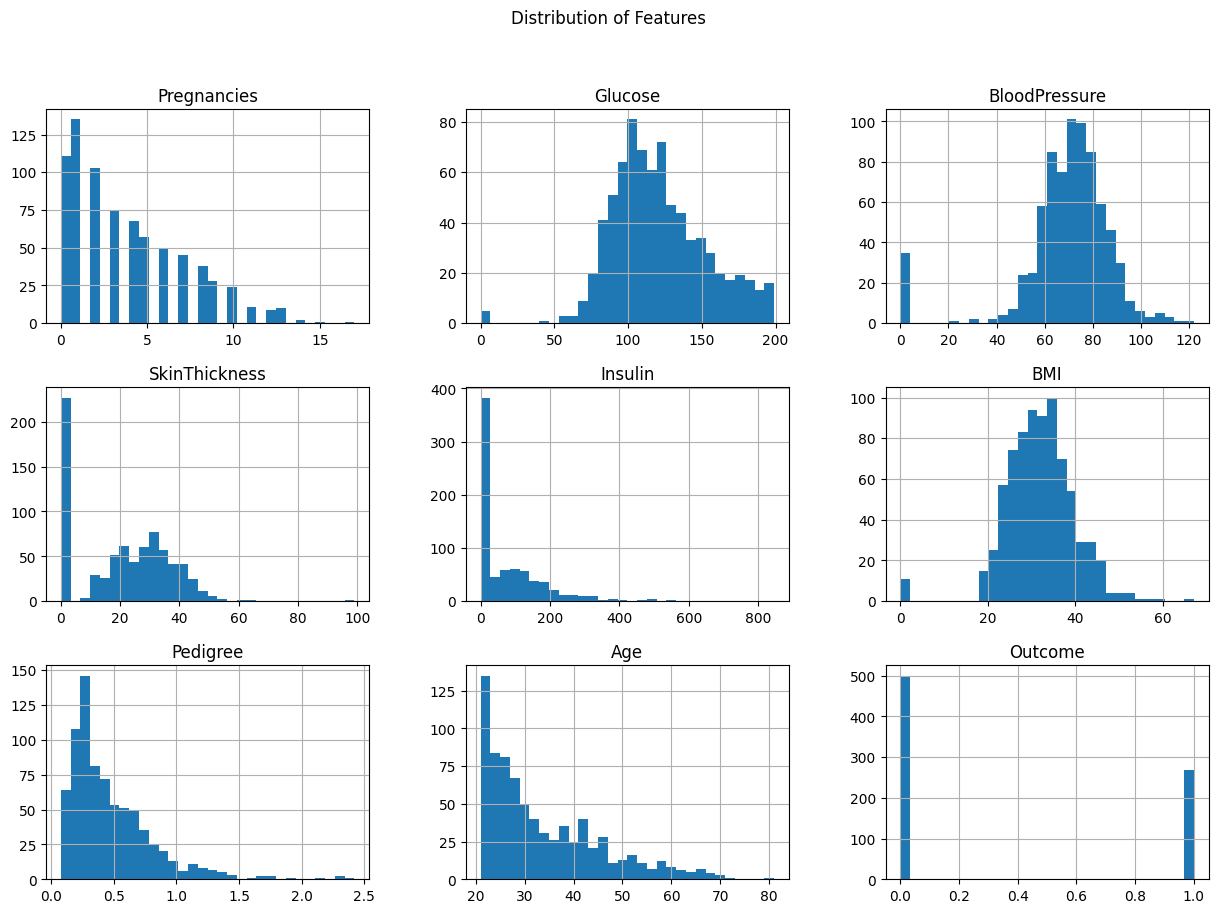

In [5]:

# Plot accuracy for different values of k
k_values = range(1, 31)
accuracies = []

for k in k_values:
    y_pred = knn_predict(X_train_scaled, y_train, X_test_scaled, k)
    accuracy = np.sum(y_test == y_pred) / len(y_test)
    accuracies.append(accuracy)

plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('k-NN Varying number of neighbors')
plt.grid(True)
plt.show()

# Plot the distribution of features
diabetes_df.hist(bins=30, figsize=(15, 10), layout=(3, 3))
plt.suptitle('Distribution of Features')
plt.show()